In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
sns.set_style('whitegrid')

In [2]:
filtered_06 = pd.read_csv('Filtered_Merged_06.csv')
filtered_07 = pd.read_csv('Filtered_Merged_07.csv')
filtered_08 = pd.read_csv('Filtered_Merged_08.csv')
filtered_09 = pd.read_csv('Filtered_Merged_09.csv')
filtered_10 = pd.read_csv('Filtered_Merged_10.csv')

In [3]:
sum(filtered_08.spd_limt.isna())

0

In [4]:
filtered_all = pd.concat([filtered_06, filtered_07,filtered_08,filtered_09,filtered_10])

In [5]:
filtered_all['curv_rad_binary'] = np.where(filtered_all['curv_rad']!= 0, 'Curve', 'No Curve')

In [6]:
filtered_all['curv_rad_binary'].value_counts()

No Curve    812185
Curve        17062
Name: curv_rad_binary, dtype: int64

In [7]:
filtered_all['med_type_binary'] = np.where(filtered_all['med_type']!= 0, 'Median', 'No Median')

In [8]:
def categorize_surface_type(df):
    if df['surf_typ'] in [300, 400, 410, 500, 550]:
        return "Flexible"
    elif df['surf_typ'] in [600, 610, 620, 630, 640, 650, 700, 710, 720, 730, 740, 800]:
        return "Rigid"
    else:
        return "Other"

In [9]:
filtered_all['surf_cat'] = filtered_all.apply(categorize_surface_type, axis = 1)

In [10]:
filtered_all['surf_cat'].value_counts()

Rigid       755532
Other        39467
Flexible     34248
Name: surf_cat, dtype: int64

In [11]:
filtered_all[['no_lanes', 'lanewid', 'aadt','seg_lng','access','oneway','spd_limt','med_type_binary',
              'surf_cat','rururb','rodwycls','curv_rad_binary','Year']]

,no_lanes,lanewid,aadt,seg_lng,access,oneway,spd_limt,med_type_binary,surf_cat,rururb,rodwycls,curv_rad_binary,Year
0,2,12,8600,0.01,0,1,45,No Median,Rigid,2,99,No Curve,6
1,2,12,8600,0.12,0,1,45,No Median,Rigid,2,99,No Curve,6
2,2,12,8600,0.03,0,1,45,No Median,Rigid,2,99,No Curve,6
3,2,12,8600,0.02,0,1,45,No Median,Rigid,2,99,No Curve,6
4,2,18,8600,0.03,0,1,45,No Median,Rigid,2,99,No Curve,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174260,4,12,25000,0.26,2,2,65,Median,Rigid,1,6,No Curve,10
174261,4,12,25000,0.29,2,2,65,Median,Rigid,1,6,No Curve,10
174262,4,12,25000,0.65,2,2,65,Median,Rigid,1,6,No Curve,10
174263,4,12,25000,0.97,2,2,65,Median,Rigid,1,6,No Curve,10


In [12]:
var_considered = ['no_lanes', 'lanewid', 'aadt','seg_lng','access','oneway','spd_limt','med_type_binary',
              'surf_cat','rururb','rodwycls','curv_rad_binary','Year']

In [13]:
#filtered_all.to_csv('AllData_Filtered_Merged_ConsolidatedCategories.csv')

In [14]:
sum(filtered_all.spd_limt.isna())

0

In [15]:
def cumfreq(a, numbins=10, defaultreallimits=None):
    # docstring omitted
    h,l,b,e = histogram(a,numbins,defaultreallimits)
    cumhist = np.cumsum(h*1, axis=0)
    return cumhist,l,b,e

/Users/jacob/anaconda/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


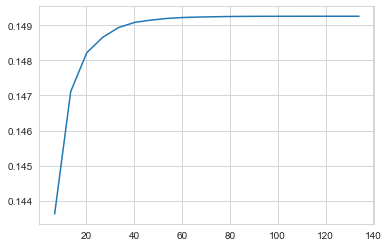

In [16]:
a = np.array(filtered_all['AccCount'])
num_bins = 20
counts, bin_edges = np.histogram(a, bins=num_bins, normed=True)
cdf = np.cumsum(counts)
pylab.plot(bin_edges[1:], cdf)


Text(0, 0.5, 'CDF')

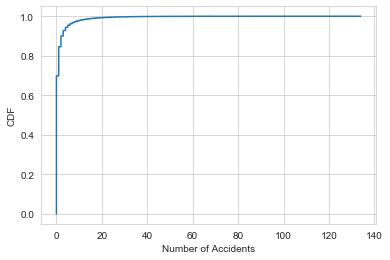

In [18]:
plt.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False))
plt.xlabel("Number of Accidents")
plt.ylabel("CDF")

Text(0, 0.5, 'CDF')

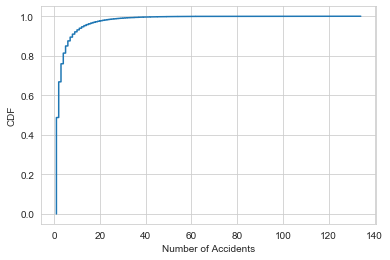

In [19]:
b = np.array(filtered_all[filtered_all.AccCount!=0]['AccCount'])
plt.plot(np.sort(b), np.linspace(0, 1, len(b), endpoint=False))
plt.xlabel("Number of Accidents")
plt.ylabel("CDF")

In [24]:
cdf = np.linspace(0, 1, len(b), endpoint=False)

In [33]:
val = 0.5
absolute_difference_function = lambda list_value : abs(list_value - val)
closest_value = min(cdf, key=absolute_difference_function)
ind = np.where(cdf == closest_value)
acccount = b[ind]

In [31]:
print(acccount, closest_value)

[1] 0.9999960022707103


In [35]:
cdf[len(cdf)-10:len(cdf)]

array([0.99996002, 0.99996402, 0.99996802, 0.99997202, 0.99997601,
       0.99998001, 0.99998401, 0.99998801, 0.999992  , 0.999996  ])

In [51]:
Acc_Cat = []
for i in range(len(filtered_all.AccCount)):
    acc = filtered_all.AccCount.iloc[i]
    if acc == 0:
        Acc_Cat.append('Zero')
    elif acc <= 30:
        Acc_Cat.append('Low')
    elif acc <= 50:
        Acc_Cat.append('Medium')
    else:
        Acc_Cat.append('High')

In [52]:
filtered_all['AccCount_cat'] = Acc_Cat

Text(0, 0.5, 'Number of Locations')

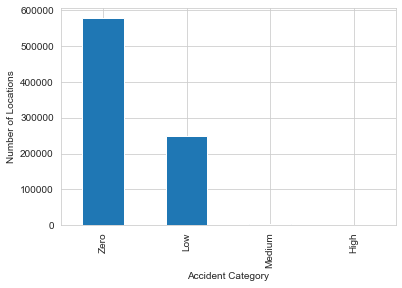

In [60]:
ax = filtered_all['AccCount_cat'].value_counts().plot.bar()
ax.set_xlabel('Accident Category')
ax.set_ylabel('Number of Locations')


In [61]:
filtered_all['AccCount_cat'].value_counts()

Zero      579105
Low       247815
Medium      1882
High         445
Name: AccCount_cat, dtype: int64